<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [81]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# This makes sure that graphs render in your notebook
%matplotlib inline


#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [82]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [83]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [84]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [85]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [86]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

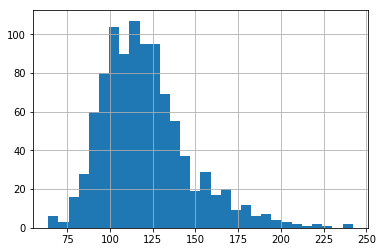

In [87]:
# Answer:
movies.duration.hist(bins=30);
# Rule of thumb whereby bin # = sqrt of # of values = sqrt 979 aprox = 30

#### Use a box plot to display that same data.

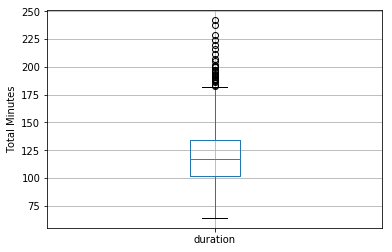

In [88]:
# Answer:
movies.boxplot(column=['duration']);
plt.ylabel("Total Minutes");

## Intermediate level

#### Count how many movies have each of the content ratings.

In [89]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

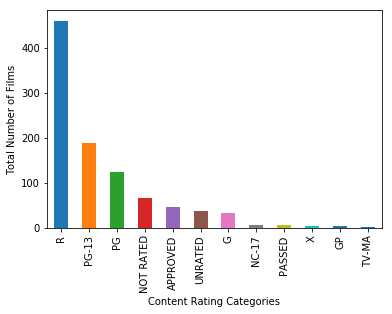

In [90]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar');
plt.xlabel("Content Rating Categories");
plt.ylabel("Total Number of Films");


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [91]:
# Answer:
movies['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [92]:
# Answer:
movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17')

0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

#### Count the number of missing values in each column.

In [93]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [94]:
# Answer:
movies[movies.content_rating.isnull()]
# We know missing values are only  in content_rating column, it's easier to use that object as a starting point
# vs going through the entire dataframe again
 

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [95]:
movies.content_rating.fillna(value='UNRATED', inplace=True)
# Conservative approach considering we already have the 'UNRATED' value for other movies, apply it to these three

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [96]:
# Answer:
two_hr_plus = movies.loc[movies['duration'] >= 120]
below_2_hr = movies.loc[movies['duration'] < 120]
y = two_hr_plus.star_rating.mean()
x = below_2_hr.star_rating.mean()
print('Average star rating for movies 2 hours or longer is: %s' %y)
print('Average star rating for movies below 2 hours is: %s' %x)
print('Difference between both averages is: %s' %(y-x))

Average star rating for movies 2 hours or longer is: 7.948898678414082
Average star rating for movies below 2 hours is: 7.838666666666657
Difference between both averages is: 0.11023201174742514


#### Use a visualization to detect whether there is a relationship between duration and star rating.

0.22714918343059196


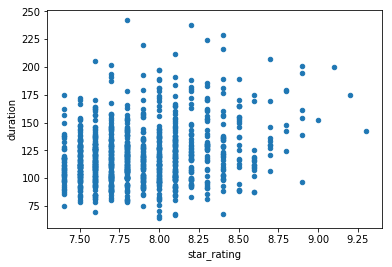

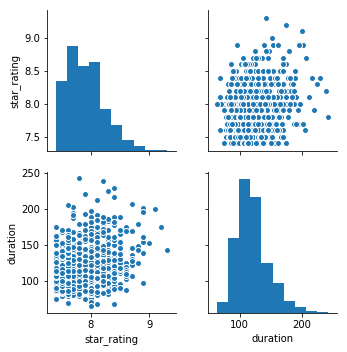

In [97]:
# Answer:
movies.plot.scatter(x='star_rating', y='duration');
print(movies['star_rating'].corr(movies['duration']))
# There does not seem to be a major correlation between the two considering the scatter plot created,
# one can infer the two variables are independent.
# By calculating the actual correlation between the two, we can see it's closer to 0 than either 1 or -1
import seaborn as sns
sns.pairplot(movies[['star_rating','duration']]);

#### Calculate the average duration for each genre.

In [98]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

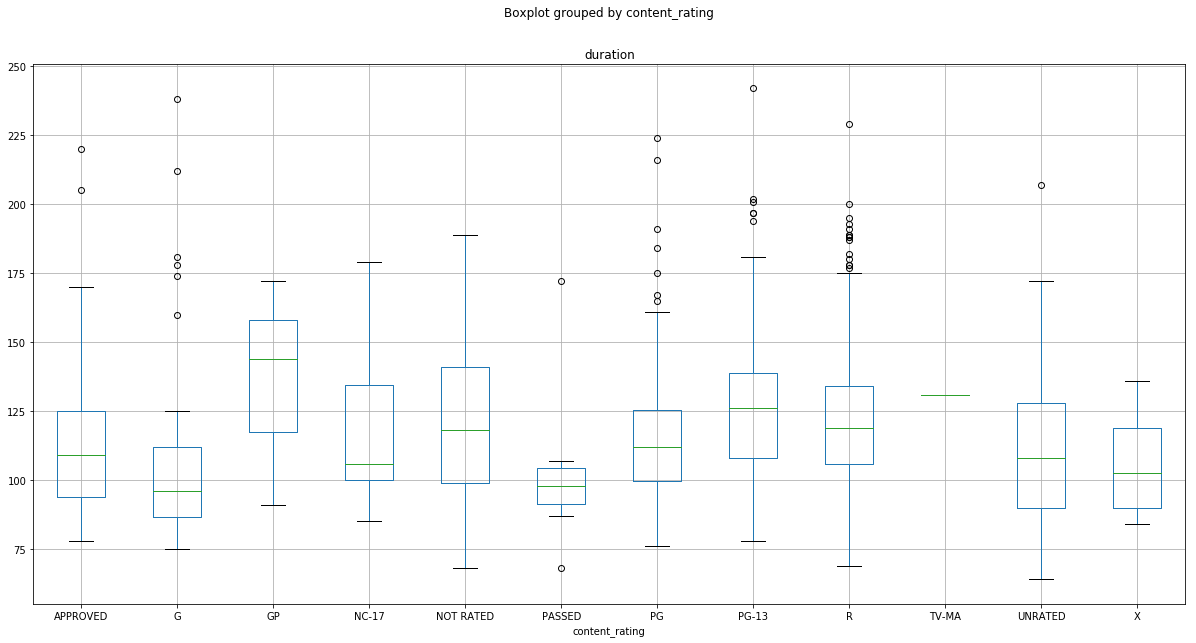

In [99]:
# Answer:
movies.boxplot(column='duration', by='content_rating', figsize = (20,10));

#### Determine the top rated movie (by star rating) for each genre.

In [139]:
# Answer:
a = movies.groupby(['genre'], as_index=False)['star_rating'].max()
b = movies.groupby(['genre','title'], as_index=False)['star_rating'].max() 
answer = pd.merge(a, b, how='inner', on=['genre', 'star_rating'])
print(answer)


        genre  star_rating                                          title
0      Action          9.0                                The Dark Knight
1   Adventure          8.9  The Lord of the Rings: The Return of the King
2   Animation          8.6                                  Spirited Away
3   Biography          8.9                               Schindler's List
4      Comedy          8.6                                    City Lights
5      Comedy          8.6                              Life Is Beautiful
6      Comedy          8.6                                   Modern Times
7       Crime          9.3                       The Shawshank Redemption
8       Drama          8.9                                   12 Angry Men
9       Drama          8.9                                     Fight Club
10     Family          7.9                     E.T. the Extra-Terrestrial
11    Fantasy          7.7                      The City of Lost Children
12  Film-Noir          8.3            

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [141]:
# Answer:
repeats_list = movies['title'].value_counts()
print(repeats_list)

answer = pd.merge(a, b, how='inner', on=['genre', 'star_rating'])

The Girl with the Dragon Tattoo                               2
True Grit                                                     2
Les Miserables                                                2
Dracula                                                       2
The Boy in the Striped Pajamas                                1
Dil Chahta Hai                                                1
Heavenly Creatures                                            1
The Assassination of Jesse James by the Coward Robert Ford    1
American Gangster                                             1
Doubt                                                         1
Master and Commander: The Far Side of the World               1
Ferris Bueller's Day Off                                      1
Run Lola Run                                                  1
The Bucket List                                               1
Begin Again                                                   1
Boyz n the Hood                         

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!